# Математическая статистика

In [1]:
from statistics import multimode

import numpy as np
import scipy.stats as sps
import ipywidgets as widgets
import matplotlib.pyplot as plt
import PyPDF2
import re

%matplotlib inline

In [2]:
N = 14
print(f'Номер в группе {N}')

Номер в группе 14


**Задача.** Получение и визуализация выборки заданного <i><u>дискретного</u></i> распределения 

<i>Шаг 1.</i> 

Из списка дискретных случайных величин выберите случайные величины с номером $N$. 

In [3]:
variants = np.array([
    1, 4, 6, 7, 12, 27, 28, 29.5, 30, 31.9, 32, 
    39, 39.1, 39.2, 39.3, 39.4, 40, 41, 42, 50
])
freq = np.array([2, 3, 4, 5, 6, 7, 7, 5, 6, 7, 8, 10, 25, 1, 1, 1, 1, 1, 4, 1]) / 105

Визуализируем входные данные для наглядности распределения:

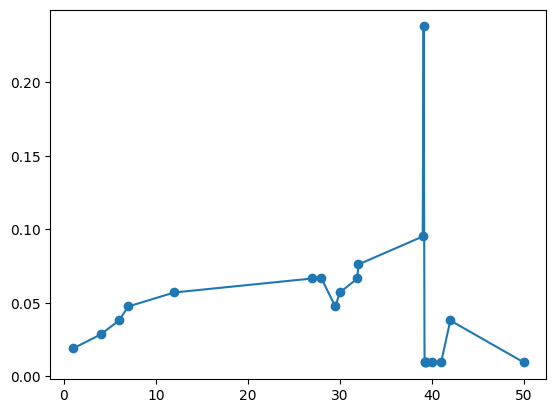

Случайная величина: Вероятностная мера


{1.0: 0.01904761904761905,
 4.0: 0.02857142857142857,
 6.0: 0.0380952380952381,
 7.0: 0.047619047619047616,
 12.0: 0.05714285714285714,
 27.0: 0.06666666666666667,
 28.0: 0.06666666666666667,
 29.5: 0.047619047619047616,
 30.0: 0.05714285714285714,
 31.9: 0.06666666666666667,
 32.0: 0.0761904761904762,
 39.0: 0.09523809523809523,
 39.1: 0.23809523809523808,
 39.2: 0.009523809523809525,
 39.3: 0.009523809523809525,
 39.4: 0.009523809523809525,
 40.0: 0.009523809523809525,
 41.0: 0.009523809523809525,
 42.0: 0.0380952380952381,
 50.0: 0.009523809523809525}

In [4]:
table = dict(zip(variants, freq))
plt.plot(variants, freq, '-o')
plt.show()

print('Случайная величина: Вероятностная мера')
table

<i>Шаг 2.</i>

Для данных случайных величин, создайте функцию распределения вашей случайной величины (если необходимо).

In [5]:
summary = sum(freq)

print(f'Сумма частот -{summary}, что не равно 1 из-за дискретности ЭВМ, поэтому выполняем нормализацию.')

freq_norm = list(map(lambda p: p / summary, freq))

print(f'Снова суммируем и получаем: {sum(freq_norm)}')

distribution = sps.rv_discrete(values = (variants, freq_norm))

Сумма частот -0.9999999999999997, что не равно 1 из-за дискретности ЭВМ, поэтому выполняем нормализацию.
Снова суммируем и получаем: 1.0


<i>Шаг 3.</i>

Создайте выборку длины 100 для вашей случайной величины. Напечатайте массив частот и массив вариант

In [6]:
size = 100
sample = distribution.rvs(size = size)

In [7]:
sample

array([42. , 12. ,  7. , 30. , 28. ,  7. , 39.1, 39.1, 39.1, 31.9, 39.1,
       31.9,  1. , 12. , 42. , 39.1, 39.1, 28. , 39.2, 42. , 29.5, 39.1,
       39.2, 12. , 42. , 30. , 39.1,  4. , 39. , 39. , 39.1, 42. , 39.1,
       39. , 39.4, 39.1, 12. ,  7. ,  7. , 42. , 32. , 12. , 31.9,  1. ,
       12. , 27. , 31.9, 32. , 31.9, 29.5, 32. , 32. , 32. , 28. , 39.4,
       39.1, 42. , 28. , 28. , 31.9, 12. , 31.9, 39.1,  6. , 27. , 39.1,
       32. , 42. , 39. ,  1. , 29.5, 39. , 41. , 30. ,  7. , 32. , 29.5,
       28. , 39. , 12. , 30. , 32. , 32. , 31.9, 32. , 39. ,  6. , 39.1,
        4. , 32. ,  7. , 12. , 27. , 32. , 39.1, 31.9, 39.1, 29.5, 39.1,
       39.1])

In [8]:
variants

array([ 1. ,  4. ,  6. ,  7. , 12. , 27. , 28. , 29.5, 30. , 31.9, 32. ,
       39. , 39.1, 39.2, 39.3, 39.4, 40. , 41. , 42. , 50. ])

<i>Шаг 4.</i>

Опишите вашу выборку: объем, экстремальные статистики, медиана, мода, размах, среднее, дисперсия, эксцесс и асимметрия. Сравните с результатами калькуляции функциями из пакета Stats https://docs.scipy.org/doc/scipy/reference/stats.html

In [9]:
from collections import Counter
from collections import OrderedDict

counter = Counter(sample)
oredered = OrderedDict(sorted(counter.items(), key = lambda t: t[0]))

variants = oredered.keys()
freq = oredered.values()

In [10]:
def find_median(array):
    middle = len(array) / 2.
    if (middle % 1 == 0):
        return (array[int(middle) + 1] + array[int(middle)]) / 2
    else:
        return array[int(middle)]

In [11]:
print('Объем выборки:', len(sample))
print('Минимум, максимум:', (min(sample), max(sample)))

avg = sum(sample) / size

def moment(n, length = size, array = sample):
    return np.sum(list(map(lambda x: (x - avg) ** n, array))) / length

print('Среднее:', avg)
print('Дисперсия:', moment(2, length = size - 1))
print('Размах:', max(sample) - min(sample))

print('Ассиметрия:', moment(3) / moment(2) ** (3 / 2))
print('Эксцесс:', moment(4) / (moment(2) ** 2) - 3)

print('II момент:', moment(2))
print('III момент:', moment(3))
print('IV момент:', moment(4))

print('Медиана:', find_median(list(sample)))
print('Мода:', multimode(list(sample)))

Объем выборки: 100
Минимум, максимум: (1.0, 42.0)
Среднее: 29.107000000000003
Дисперсия: 150.80186969696973
Размах: 41.0
Ассиметрия: -1.0063124183220482
Эксцесс: -0.31553203737742574
II момент: 149.29385100000002
III момент: -1835.6746612140016
IV момент: 59833.1774491194
Медиана: 32.0
Мода: [39.1]


Получаем значения через функции из пакета Stats

In [12]:
obj = sps.describe(sample)

print('Объем выборки:', obj.nobs)
print('Минимум, максимум:', obj.minmax)
print('Среднее:', obj.mean)
print('Дисперсия:', obj.variance)

print('Ассиметрия:', obj.skewness)
print('Эксцесс:', obj.kurtosis)

print('II момент:', sps.moment(sample, moment = 2))
print('III момент:', sps.moment(sample, moment = 3))
print('IV момент:', sps.moment(sample, moment = 4))

mode = sps.mode(sample, keepdims = False)

print(f'Мода: {mode.mode} количество: {mode.count}')

Объем выборки: 100
Минимум, максимум: (1.0, 42.0)
Среднее: 29.107
Дисперсия: 150.80186969696973
Ассиметрия: -1.0063124183220473
Эксцесс: -0.3155320373774271
II момент: 149.29385100000002
III момент: -1835.6746612139998
IV момент: 59833.17744911938
Мода: 39.1 количество: 19


Как мы видим, все характеристики совпадают

<i>Шаг 5.</i>

Создайте полигон частот и гистограмму для каждой выборки


Список количества каждой случайной величины в выборке

In [13]:
counter

Counter({39.1: 19,
         32.0: 12,
         12.0: 9,
         31.9: 9,
         42.0: 8,
         39.0: 7,
         7.0: 6,
         28.0: 6,
         29.5: 5,
         30.0: 4,
         1.0: 3,
         27.0: 3,
         39.2: 2,
         4.0: 2,
         39.4: 2,
         6.0: 2,
         41.0: 1})

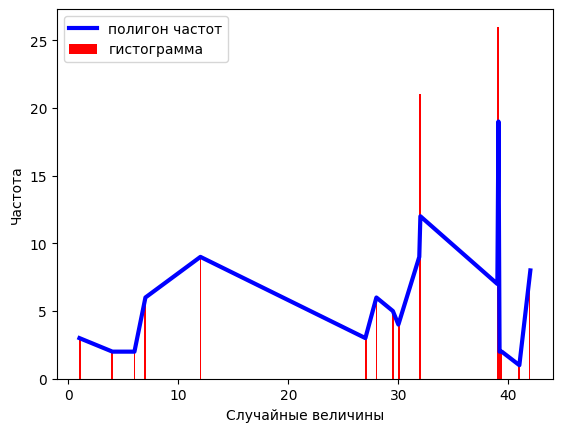

In [14]:
plt.figure()
plt.plot(variants, freq, color = 'blue', lw = 3, label = 'полигон частот')
plt.hist(sample, 3 * size, color = 'red', label = 'гистограмма')
plt.legend()

plt.xlabel('Случайные величины')
plt.ylabel('Частота')

plt.show()

**Задача.** Получение и визуализация выборки заданного <i><u>непрерывного</u></i> распределения.

<i>Шаг 1.</i> 

Из списка непрерывных случйных величин выберите с номером $N$. 

In [15]:
reader = PyPDF2.PdfReader('datasets/Непрерывные величны, практикум 1.pdf')

message = 'Вариант '
variant = f'Вариант {N}'

for i in range(len(reader.pages)):
    
    text = reader.pages[i].extract_text()
    
    if variant in text:
        index = text.index(str(N))
        
        end = index
        while not end == len(text) and not text[end] == 'Вариант':
            message += text[end]
            end += 1
        break

print(message)

Вариант 14
X распределен по закону N(2, 5)



In [16]:
parameters = re.findall(r'\w+', message)

μ = int(parameters[-2])
σ_square = int(parameters[-1])

print(f'μ = {μ}, σ_square = {σ_square}')

μ = 2, σ_square = 5


<i>Шаг 2.</i>

Для данных случайных величин, создайте функцию распределения вашей случайной величины (если необходимо).

In [17]:
normal = sps.norm.rvs(size = size, loc = μ, scale = np.sqrt(σ_square))
show_count = 12

print(f'Первые {show_count} значений выборки:\n', normal[:show_count])

Первые 12 значений выборки:
 [ 2.92356683 -0.34373191 -1.86564215  2.06915485 -2.29806052  3.12261022
  0.76027313  1.79849731  1.60335364  1.12187707  1.08434017  3.63988709]


<i>Шаг 3.</i>

Создайте выборку длины 100 для вашей случайной величины. Напечатайте массив частот и массив вариант

In [18]:
bin_count = 15

bins = np.linspace(min(normal), max(normal), num = bin_count)
            
counter = Counter(np.digitize(normal, bins))
oredered = OrderedDict(sorted(counter.items(), key = lambda t: t[0]))

data = dict.fromkeys(bins, 0)

for key, count in oredered.items():
    data[bins[key - 1]] = count

print(f'Массив вариант: \n{data.keys()}', '\n\n' , f'Массив частот: \n{data.values()}')

Массив вариант: 
dict_keys([-2.29806052447773, -1.6320901267292809, -0.9661197289808316, -0.3001493312323824, 0.36582106651606683, 1.0317914642645158, 1.6977618620129653, 2.3637322597614148, 3.029702657509864, 3.695673055258313, 4.361643453006762, 5.027613850755212, 5.693584248503661, 6.359554646252111, 7.02552504400056]) 

 Массив частот: 
dict_values([5, 4, 5, 4, 11, 10, 12, 15, 13, 7, 7, 5, 0, 1, 1])


<i>Шаг 4.</i>

Опишите вашу выборку: объем, экстремальные статистики, медиана, мода, размах, среднее, дисперсия, эксцесс и асимметрия. Сравните с результатами калькуляции функциями из пакета Stats https://docs.scipy.org/doc/scipy/reference/stats.html

In [19]:
print('Объем выборки:', len(normal))
print('Минимум, максимум:', (min(normal), max(normal)))

avg = sum(normal) / size

print('Среднее:', avg)
print('Дисперсия:', moment(2, length = size - 1, array = normal))
print('Размах:', max(normal) - min(normal))

print('Ассиметрия:', moment(3, array = normal) / moment(2, array = normal) ** (3 / 2))
print('Эксцесс:', moment(4, array = normal) / (moment(2, array = normal) ** 2) - 3)

print('II момент:', moment(2, array = normal))
print('III момент:', moment(3, array = normal))
print('IV момент:', moment(4, array = normal))

print('Медиана:', find_median(list(normal)))
print('Мода (ограничение на 3 значения):', multimode(list(normal))[:3])

Объем выборки: 100
Минимум, максимум: (-2.29806052447773, 7.02552504400056)
Среднее: 2.1201014994672045
Дисперсия: 4.101814091129749
Размах: 9.32358556847829
Ассиметрия: -0.1461860751364756
Эксцесс: -0.2976120319518918
II момент: 4.060795950218451
III момент: -1.1962522209407356
IV момент: 44.562549868483174
Медиана: 2.789981890476227
Мода (ограничение на 3 значения): [2.9235668277923743, -0.3437319139140902, -1.8656421504717802]


Получаем значения через функции из пакета Stats

In [20]:
obj = sps.describe(normal)

print('Объем выборки:', obj.nobs)
print('Минимум, максимум:', obj.minmax)
print('Среднее:', obj.mean)
print('Дисперсия:', obj.variance)

print('Ассиметрия:', obj.skewness)
print('Эксцесс:', obj.kurtosis)

print('II момент:', sps.moment(normal, moment = 2))
print('III момент:', sps.moment(normal, moment = 3))
print('IV момент:', sps.moment(normal, moment = 4))

mode = sps.mode(normal, keepdims = False)

print(f'Мода: {mode.mode} количество: {mode.count}')

Объем выборки: 100
Минимум, максимум: (-2.29806052447773, 7.02552504400056)
Среднее: 2.120101499467205
Дисперсия: 4.10181409112975
Ассиметрия: -0.14618607513647625
Эксцесс: -0.2976120319518931
II момент: 4.060795950218452
III момент: -1.1962522209407411
IV момент: 44.562549868483174
Мода: -2.29806052447773 количество: 1


Как мы видим, все характеристики совпадают

<i>Шаг 5.</i>

Создайте полигон частот и гистограмму для каждой выборки


Список количества каждой случайной величины в выборке

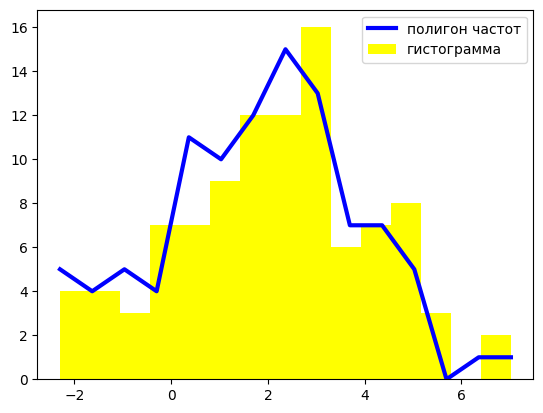

In [21]:
plt.figure()
plt.plot(data.keys(), data.values(), color = 'blue', lw = 3, label = 'полигон частот')
plt.hist(normal, bin_count, color = 'yellow', label = 'гистограмма')
plt.legend()
plt.show()